In [1]:
import sys
import os
  
# # getting the name of the directory
# # where the this file is present.
current = os.path.dirname(os.path.realpath("ResultAnalysis.ipynb"))
  
# # Getting the parent directory name
# # where the current directory is present.
parent = os.path.dirname(current)
  
# # adding the parent directory to 
# # the sys.path.
sys.path.append(parent)
#print(parent)

In [2]:
from sklearn.metrics import confusion_matrix
from graphsage.utils2 import load_cora, load_ppi, load_wikics, custom_load_pubmed
import numpy as np

In [3]:
lsh_helper = {'n_vectors': 16, 'search_radius': 2, 'num_lsh_neighbours': 5,'atleast': True, 'includeNeighbourhood':False}      
data_dic = load_wikics(lsh_helper = lsh_helper, )

Loading WikiCS
loading dataframe of
Loading normal random walks
loading gs embeddings as node features  (11701, 128)
loading khop neighbours


In [4]:
data_dic.keys()

dict_keys(['feat_data', 'labels', 'adj_lists', 'train_mask', 'test_mask', 'val_mask', 'distances', 'cluster_labels', 'freq', 'dist_in_graph', 'centralityev', 'centralitybtw', 'centralityh', 'centralityd', 'lsh_neighbour_list'])

In [14]:
np.array(data_dic['train_mask']).shape

(11701,)

In [7]:
np.array(data_dic['labels']).shape

(11701,)

In [9]:
data_dic['adj_lists']

{0: {3925, 7248, 7547, 8554, 8921, 8934, 10020, 10090, 10271},
 1: {6476, 6797},
 2: {2, 1804, 6837, 7983},
 3: {1178,
  3269,
  4255,
  4604,
  5047,
  5640,
  5960,
  6479,
  7288,
  7767,
  8353,
  8539,
  8683,
  9893,
  10340,
  10511,
  11030,
  11111,
  11203,
  11530},
 4: {7527, 9640},
 5: {609, 1541, 7802, 10924},
 6: {1083,
  1602,
  2259,
  4957,
  5637,
  5875,
  7492,
  7579,
  7669,
  8355,
  8978,
  9356,
  9732,
  10303,
  10574},
 7: {1012,
  2080,
  2083,
  2087,
  2143,
  2274,
  3323,
  3477,
  4242,
  4586,
  4663,
  5433,
  6098,
  6750,
  6888,
  7053,
  7217,
  7983,
  8670,
  9635,
  10058,
  10580,
  11673},
 8: {8, 2041, 4081, 5540, 7515},
 9: {319,
  345,
  823,
  1347,
  2045,
  3876,
  4564,
  5783,
  6536,
  6797,
  7539,
  7983,
  8627,
  8628,
  11023},
 10: {7164, 10610, 11529},
 11: {899,
  2275,
  2558,
  2887,
  3462,
  4198,
  4212,
  4373,
  4589,
  7337,
  8865,
  9548,
  10448,
  10842,
  11250},
 12: {1982, 3876, 6536, 7558, 11641},
 13: {479,

In [11]:
data_dic['lsh_neighbour_list']

{}

### Cora

In [12]:
data_dic_cora = load_cora(lsh_helper=lsh_helper, augment_khop=True)

creating lsh
features copy shape  (2708, 1433)
done


In [13]:
data_dic_cora['lsh_neighbour_list']

{163: [1266, 941, 2077, 2439, 714],
 402: [16, 2638, 1671, 109, 1693],
 659: [417, 1541, 2143, 1595, 688],
 1696: [221, 2202, 693, 2577, 788],
 2295: [1096, 1098, 2084, 1655, 2202],
 1274: [296, 2519, 2299, 1169, 111],
 1286: [2397, 475, 1916, 2049, 186],
 1544: [1364, 1691, 218, 1230, 370],
 2600: [1364, 2078, 1199, 1883, 774],
 2363: [140, 2515, 660, 2357, 545],
 1905: [1703, 58, 1342, 411, 492],
 1611: [2554, 2112, 2532, 1210, 117],
 141: [2470, 1152, 1951, 2229, 2151],
 1807: [1216, 666, 2217, 57, 1316],
 1110: [1166, 568, 2264, 802, 1957],
 174: [1437, 2361, 972, 1841, 2250],
 2521: [2525, 1929, 362, 2257, 678],
 1792: [231, 758, 2359, 2348, 582],
 1675: [429, 1018, 1303, 1505, 2617],
 1334: [2030, 541, 1578, 1506, 223],
 813: [1099, 821, 190, 302, 1167],
 1799: [941, 2059, 2539, 634, 1909],
 1943: [2514, 2157, 756, 2469, 1791],
 2077: [1354, 163, 2653, 2408, 916],
 765: [1377, 144, 929, 1334, 541],
 769: [2047, 1333, 1467, 935, 2074],
 781: [440, 1797, 1444, 2120, 2106],
 940: [1

In [81]:
pred_dir = '/home/thummala/graphsage-pytorch/res/cora/lshaugment_20_20_na_2_10_false_2_save'
gs_dir = '/home/thummala/graphsage-pytorch/res/cora/graphsage_save'

In [82]:
y_pred_augment = np.load(pred_dir+'/predictions.npy')
y_pred_gs = np.load(gs_dir+'/predictions.npy')

In [84]:
def get_masks(dir_):
    test = np.load(dir_+'/test.npy')
    print(test)
    train = np.load(dir_+'/train.npy')
    val = np.load(dir_+'/val.npy')
    train_mask = []
    test_mask = []
    val_mask = []
    for i in range(2708):
        if i in train:
            train_mask.append(True)
            test_mask.append(False)
            val_mask.append(False)
        elif i in val:
            train_mask.append(False)
            test_mask.append(False)
            val_mask.append(True)
        else:
            train_mask.append(False)
            test_mask.append(True)
            val_mask.append(False)
    return train_mask,test_mask,val_mask

In [85]:
train_mask_gs, test_mask_gs, val_mask_gs = get_masks(gs_dir)
train_mask_augment, test_mask_augment, val_mask_augment = get_masks(pred_dir)

[ 996 1140 1145 ... 1347 1972 2384]
[ 996 1140 1145 ... 1347 1972 2384]


In [86]:
labels = np.array(data_dic_cora['labels'])
y_true_gs = labels[test_mask_gs]
y_true_augment = labels[test_mask_augment]

In [91]:
(y_true_gs == y_true_augment).all()

True

In [87]:
print(y_true_gs.shape,y_pred_gs.shape)

(1500, 1) (1500,)


In [88]:
confusion_matrix(y_true_gs,y_pred_gs)

array([[137,  26,  39,  59,  67,  70,  48],
       [ 25,   7,   6,  21,  18,  15,   9],
       [ 36,   3,   9,  14,  17,  20,  11],
       [ 81,  10,  23,  47,  31,  29,  32],
       [ 76,   9,  15,  22,  33,  36,  18],
       [ 66,  12,  20,  32,  31,  30,  26],
       [ 52,  11,  15,  23,  21,  18,  24]])

In [89]:
confusion_matrix(y_true_augment,y_pred_augment)

array([[145,  42,  34,  58,  73,  71,  23],
       [ 25,   8,   5,  21,  21,  15,   6],
       [ 35,   9,  11,  12,  18,  19,   6],
       [ 83,  15,  20,  39,  45,  32,  19],
       [ 74,  18,  12,  24,  31,  34,  16],
       [ 66,  20,  18,  32,  35,  33,  13],
       [ 50,  11,  17,  20,  30,  20,  16]])

In [93]:
pred_dir = '/home/thummala/graphsage-pytorch/res/cora/lshaugment_20_20_na_2_10_false_1_save'
train_mask_augment, test_mask_augment, val_mask_augment = get_masks(pred_dir)
y_pred_augment = np.load(pred_dir+'/predictions.npy')
confusion_matrix(y_true_augment,y_pred_augment)

[ 996 1140 1145 ... 1347 1972 2384]


array([[129,  29,  32,  68,  54,  81,  53],
       [ 26,   7,   5,  22,  15,  17,   9],
       [ 34,   3,  10,  15,  16,  21,  11],
       [ 74,  13,  22,  50,  28,  33,  33],
       [ 71,  11,  14,  26,  25,  38,  24],
       [ 64,  13,  18,  37,  29,  32,  24],
       [ 50,  10,  13,  26,  19,  18,  28]])

In [11]:
y_pred.shape

(1500,)

In [14]:
data_dic['test_mask']

[]

In [13]:
data_dic.keys()

dict_keys(['feat_data', 'labels', 'adj_lists', 'train_mask', 'test_mask', 'val_mask', 'distances', 'cluster_labels', 'freq', 'dist_in_graph', 'centralityev', 'centralitybtw', 'centralityh', 'centralityd', 'lsh_neighbour_list'])

In [79]:
np.random.seed(1)
rand_indices = np.random.permutation(2708)

In [80]:
rand_indices

array([ 996, 1140, 1145, ..., 1096,  235, 1061])

### WikiCS

In [4]:
data_dic = load_wikics(lsh_helper={})

Loading WikiCS
loading dataframe of
Loading normal random walks
loading gs embeddings as node features  (11701, 128)
loading khop neighbours


In [5]:
labels = np.array(data_dic['labels'])
y_test = labels[data_dic['test_mask']]

In [115]:
pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshaugment_20_20_na_2_20_false_2'
gs_dir = '/home/thummala/graphsage-pytorch/res/wikics/graphsage'

In [107]:
y_pred = np.load(gs_dir+'/predictions.npy')

In [108]:
y_pred

array([2, 4, 4, ..., 4, 3, 2])

In [109]:
y_test

array([2, 4, 2, ..., 4, 3, 2])

In [110]:
confusion_matrix(y_test,y_pred)

array([[ 120,    7,    1,    0,    2,    1,    0,    1,    0,   15],
       [   5,  234,    6,    2,   32,    3,    6,    7,   11,   27],
       [   0,    9,  827,   63,   45,   28,   19,   21,    8,   56],
       [   2,    5,  117,  767,   13,   17,    8,   12,    0,   25],
       [   3,   13,   42,   15, 1085,   59,   25,   56,   19,   22],
       [   0,    2,   36,   10,   30,  278,    6,   13,   10,    5],
       [   0,    5,   41,    3,    9,    5,  134,    5,    2,    2],
       [   2,   17,   46,   26,   19,   34,    2,  263,   12,   11],
       [   5,    6,    9,    2,   17,   31,    0,   29,  137,   10],
       [  11,    4,   46,    7,    9,    5,    1,    7,   20,  602]])

In [111]:
y_pred_augmented = np.load(pred_dir + '/predictions.npy')
confusion_matrix(y_test,y_pred_augmented)

array([[ 103,   11,    2,    0,    7,    1,    0,    0,    1,   22],
       [   6,  236,    9,    1,   32,    6,    4,    8,   10,   21],
       [   0,    7,  816,   68,   46,   14,   27,   20,   10,   68],
       [   4,    6,  111,  765,   17,   12,   10,    5,    1,   35],
       [   3,   19,   43,   35, 1058,   55,   22,   54,   13,   37],
       [   0,    2,   36,   13,   29,  267,   10,   14,   11,    8],
       [   0,    3,   34,    3,    8,    2,  142,    5,    3,    6],
       [   3,   16,   47,   24,   22,   20,    3,  263,   12,   22],
       [   3,    4,    9,    1,   13,   27,    1,   36,  143,    9],
       [  18,    6,   35,    4,    2,    7,    0,    4,   17,  619]])

In [112]:
pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshaugment_20_20_20_2_20_true_2'
y_pred_augmented = np.load(pred_dir + '/predictions.npy')
confusion_matrix(y_test,y_pred_augmented)

array([[ 104,    8,    2,    0,    6,    2,    0,    1,    0,   24],
       [   5,  216,   12,    4,   38,    5,    3,   10,   14,   26],
       [   0,   10,  810,   61,   58,   12,   35,   19,    6,   65],
       [   3,    4,  116,  758,   19,   15,   10,    6,    1,   34],
       [   1,   20,   54,   35, 1038,   72,   17,   52,   22,   28],
       [   0,    1,   34,   11,   35,  266,   10,   16,    9,    8],
       [   0,    2,   51,    3,   13,    3,  116,    6,    3,    9],
       [   4,   15,   49,   28,   27,   26,    1,  250,   13,   19],
       [   1,    5,    8,    4,   16,   29,    1,   33,  140,    9],
       [  17,    8,   50,    7,    3,    4,    0,    1,   23,  599]])

In [113]:
feat_data = np.array(data_dic['feat_data'])
test_feat_data = feat_data[data_dic['test_mask']]

In [11]:
from sklearn.manifold import TSNE
test_feat_data_tsne = TSNE(random_state=0).fit_transform(test_feat_data)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

#     # We add the labels for each cluster.
#     txts = []
#     for i in range(10):
#         # Position of each label.
#         xtext, ytext = np.median(x[colors == i, :], axis=0)
#         txt = ax.text(xtext, ytext, str(i), fontsize=50)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

    return f, ax, sc

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85ca4f58d0>)

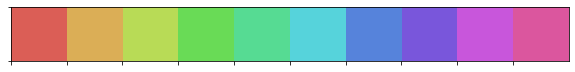

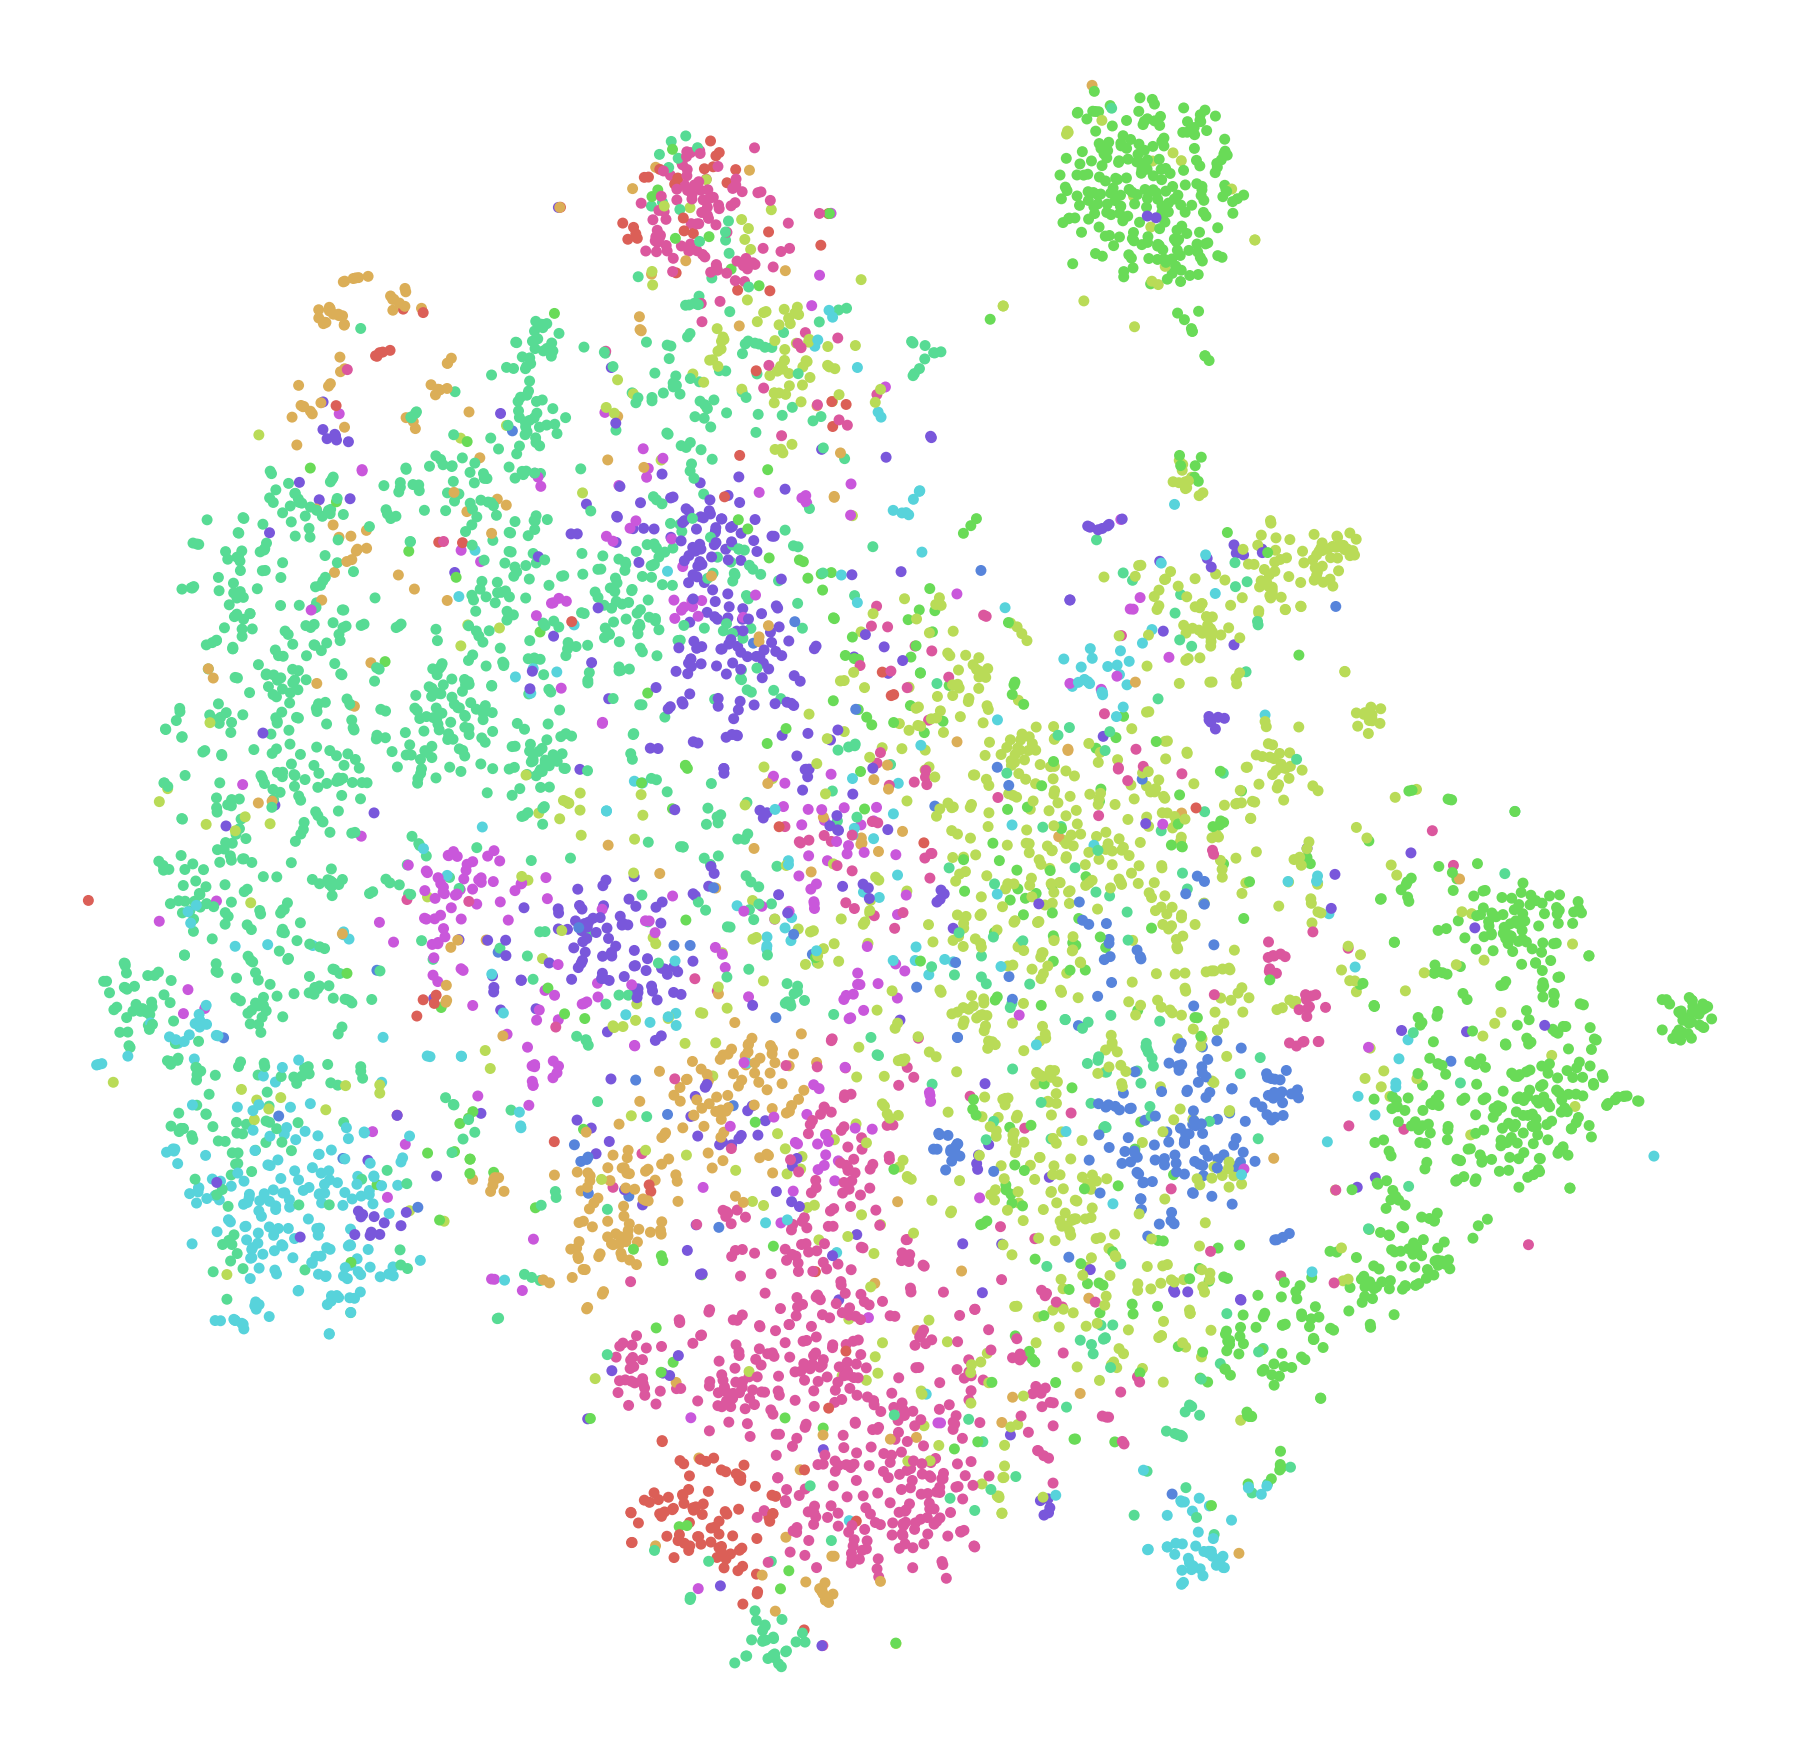

In [122]:
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(test_feat_data_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85c9f01358>)

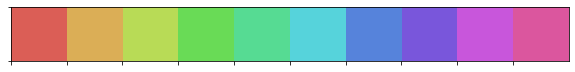

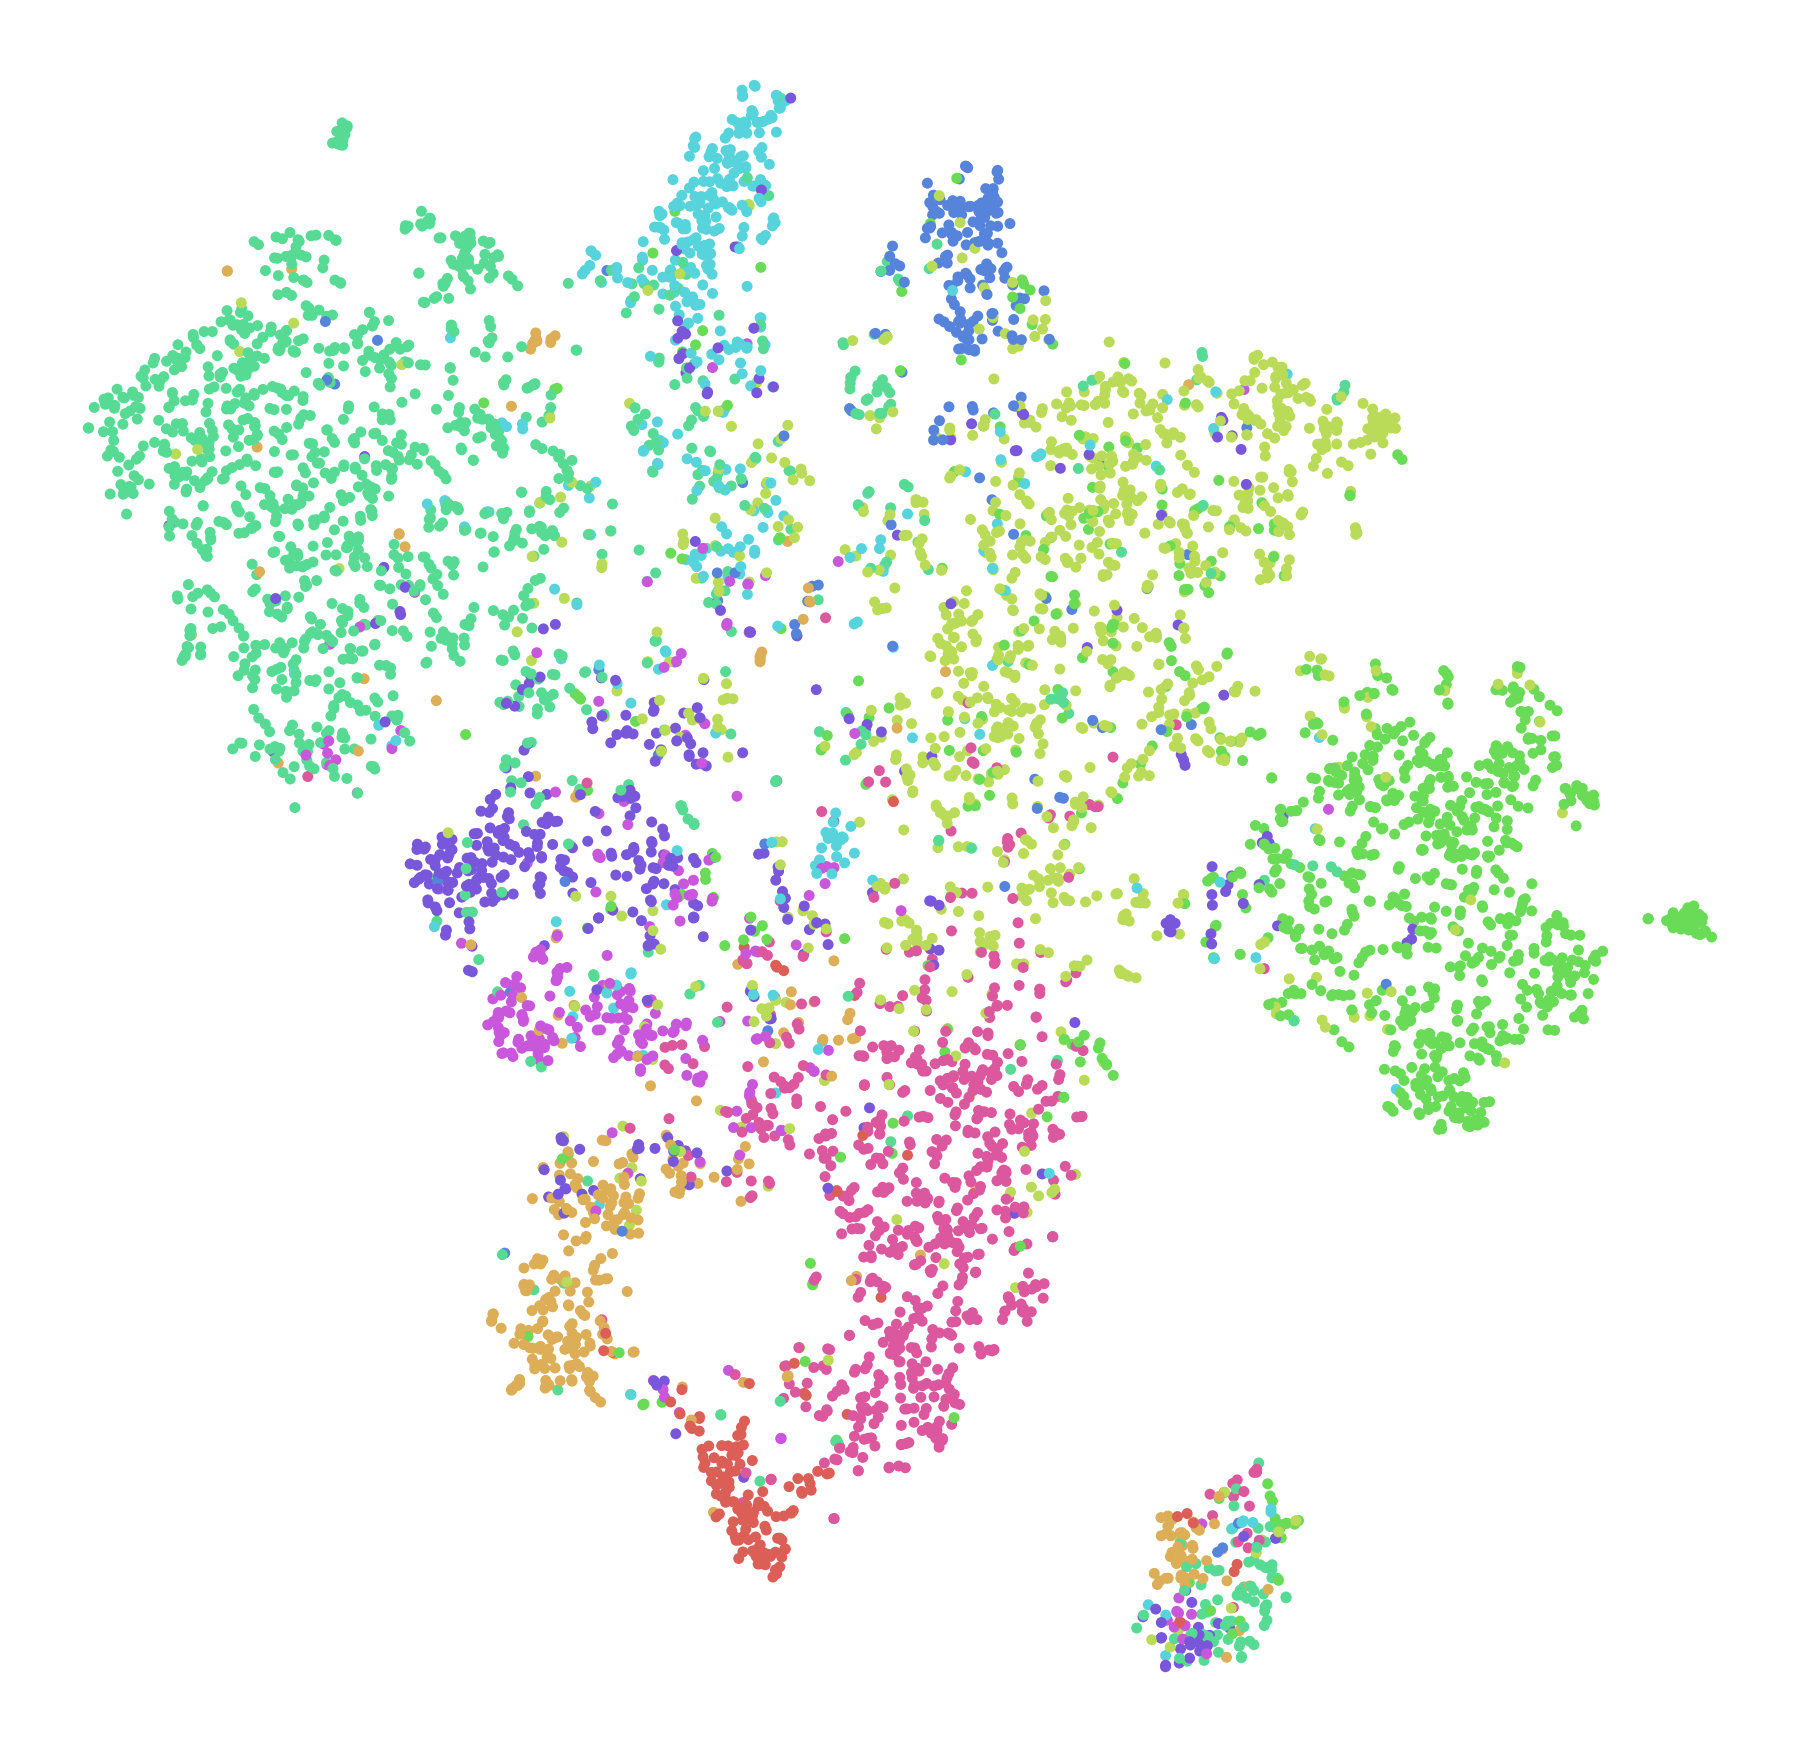

In [114]:
gs_embedding = np.load(gs_dir+'/embeddings.npy')
wikics_gs_tsne =  TSNE(random_state=0).fit_transform(gs_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_gs_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85ca6a3b38>)

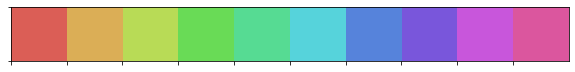

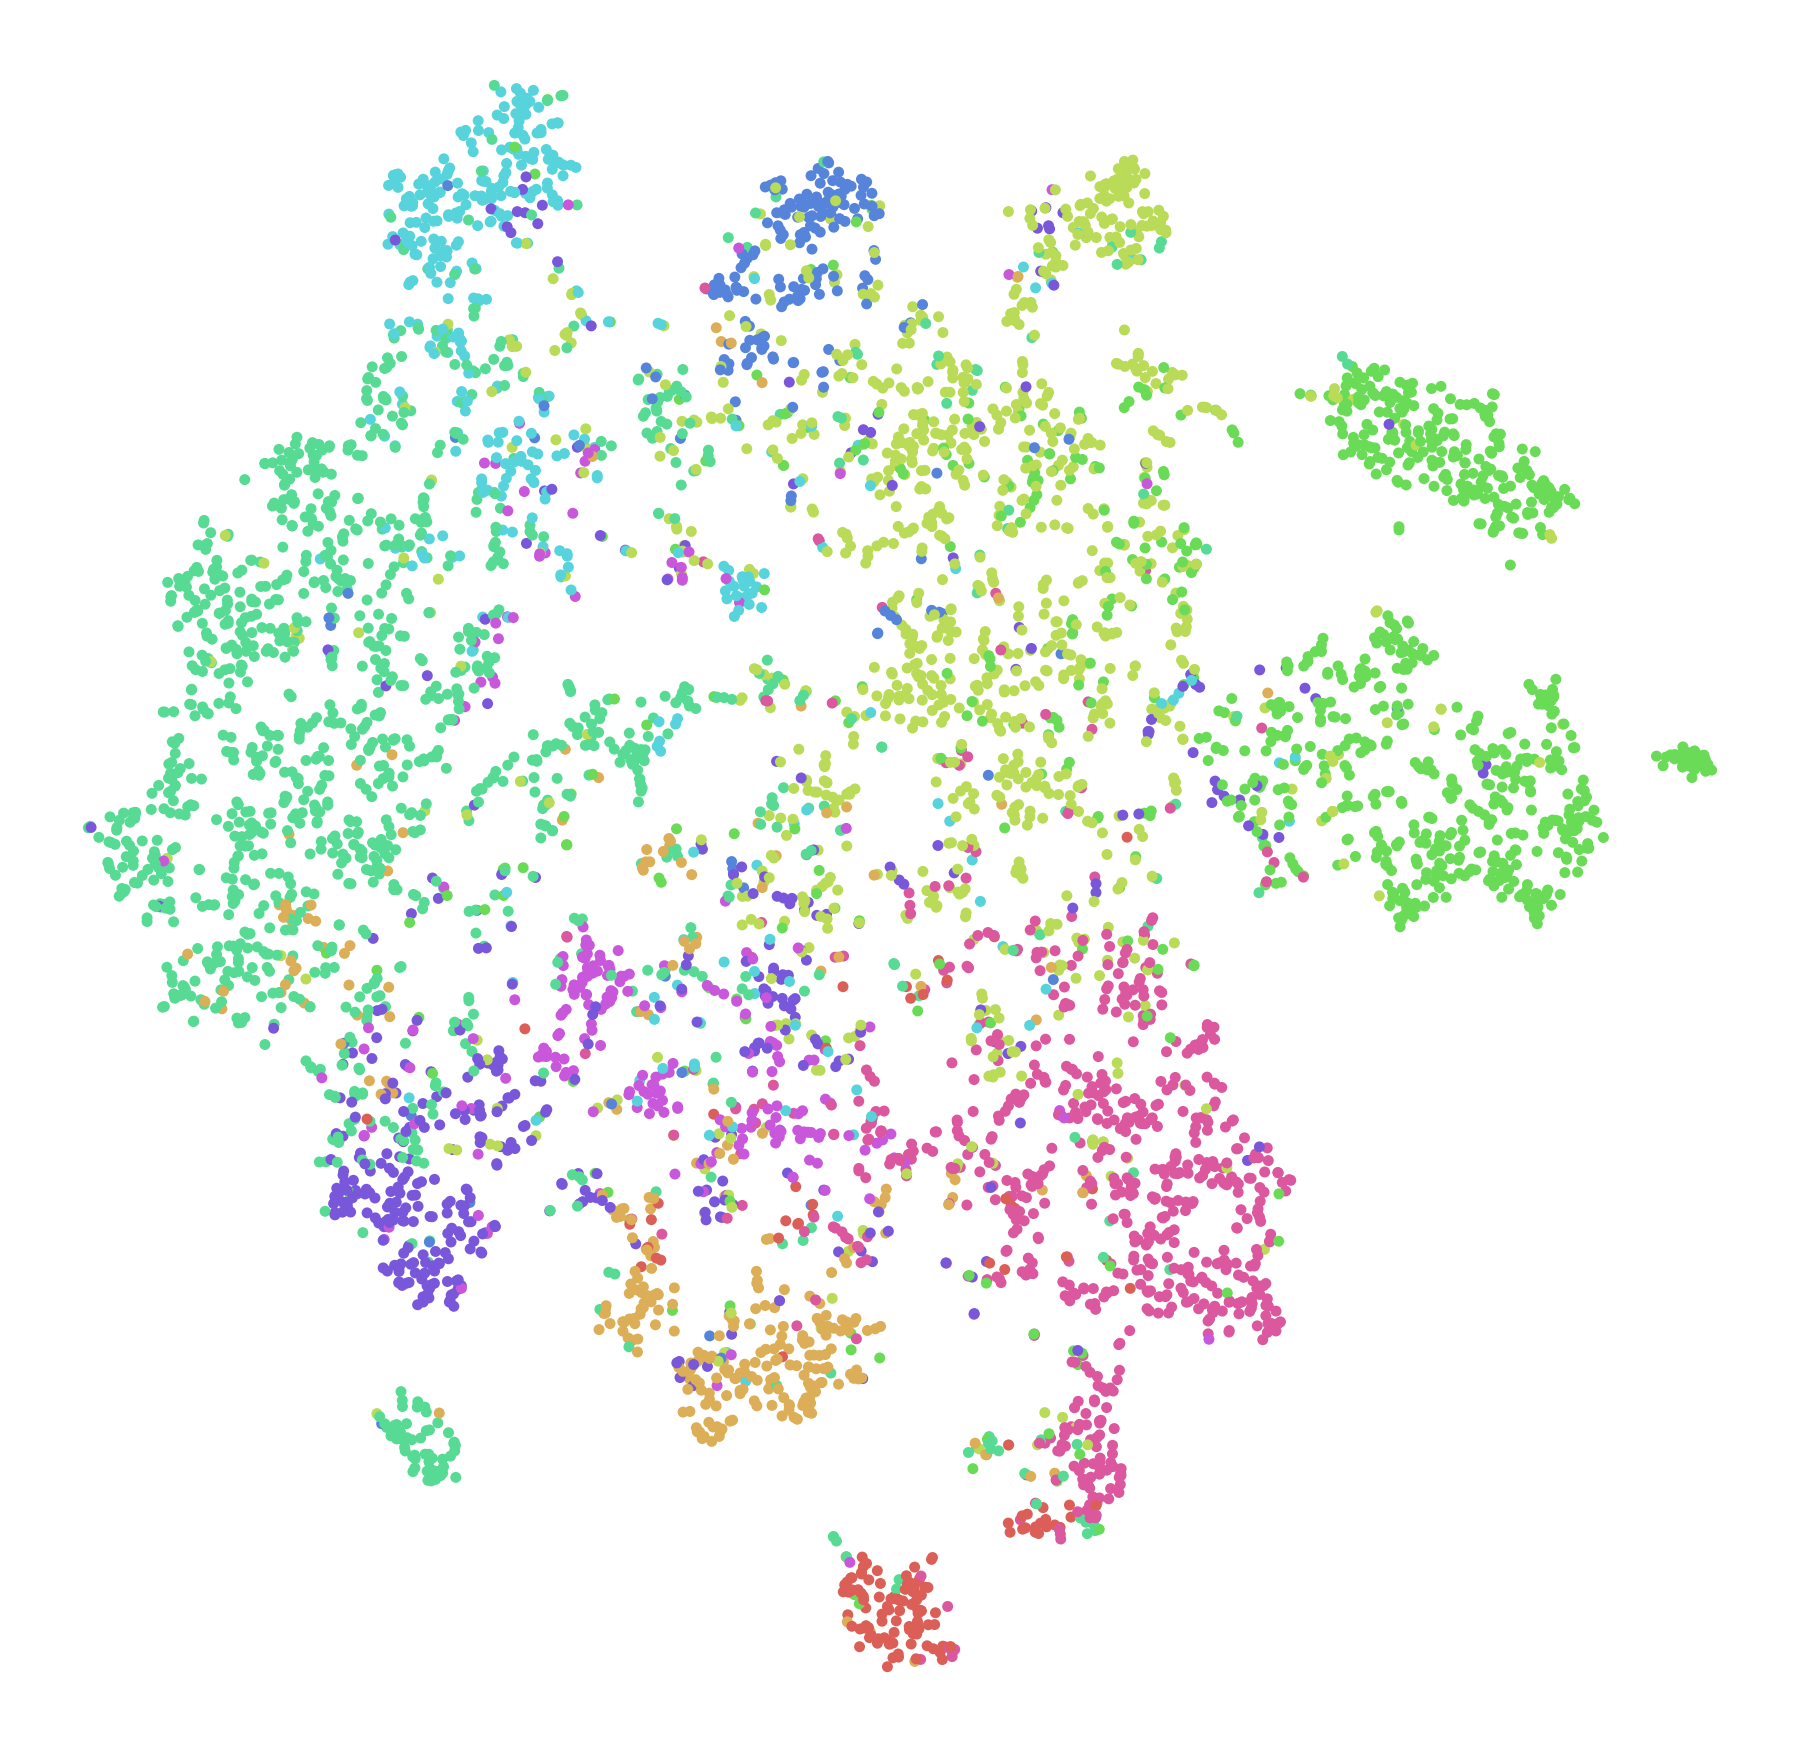

In [116]:
augmented_embedding = np.load(pred_dir+'/embeddings.npy')
wikics_augmented_tsne =  TSNE(random_state=0).fit_transform(augmented_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_augmented_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85ca1e4128>)

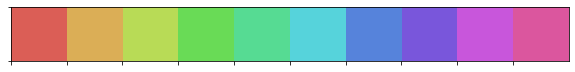

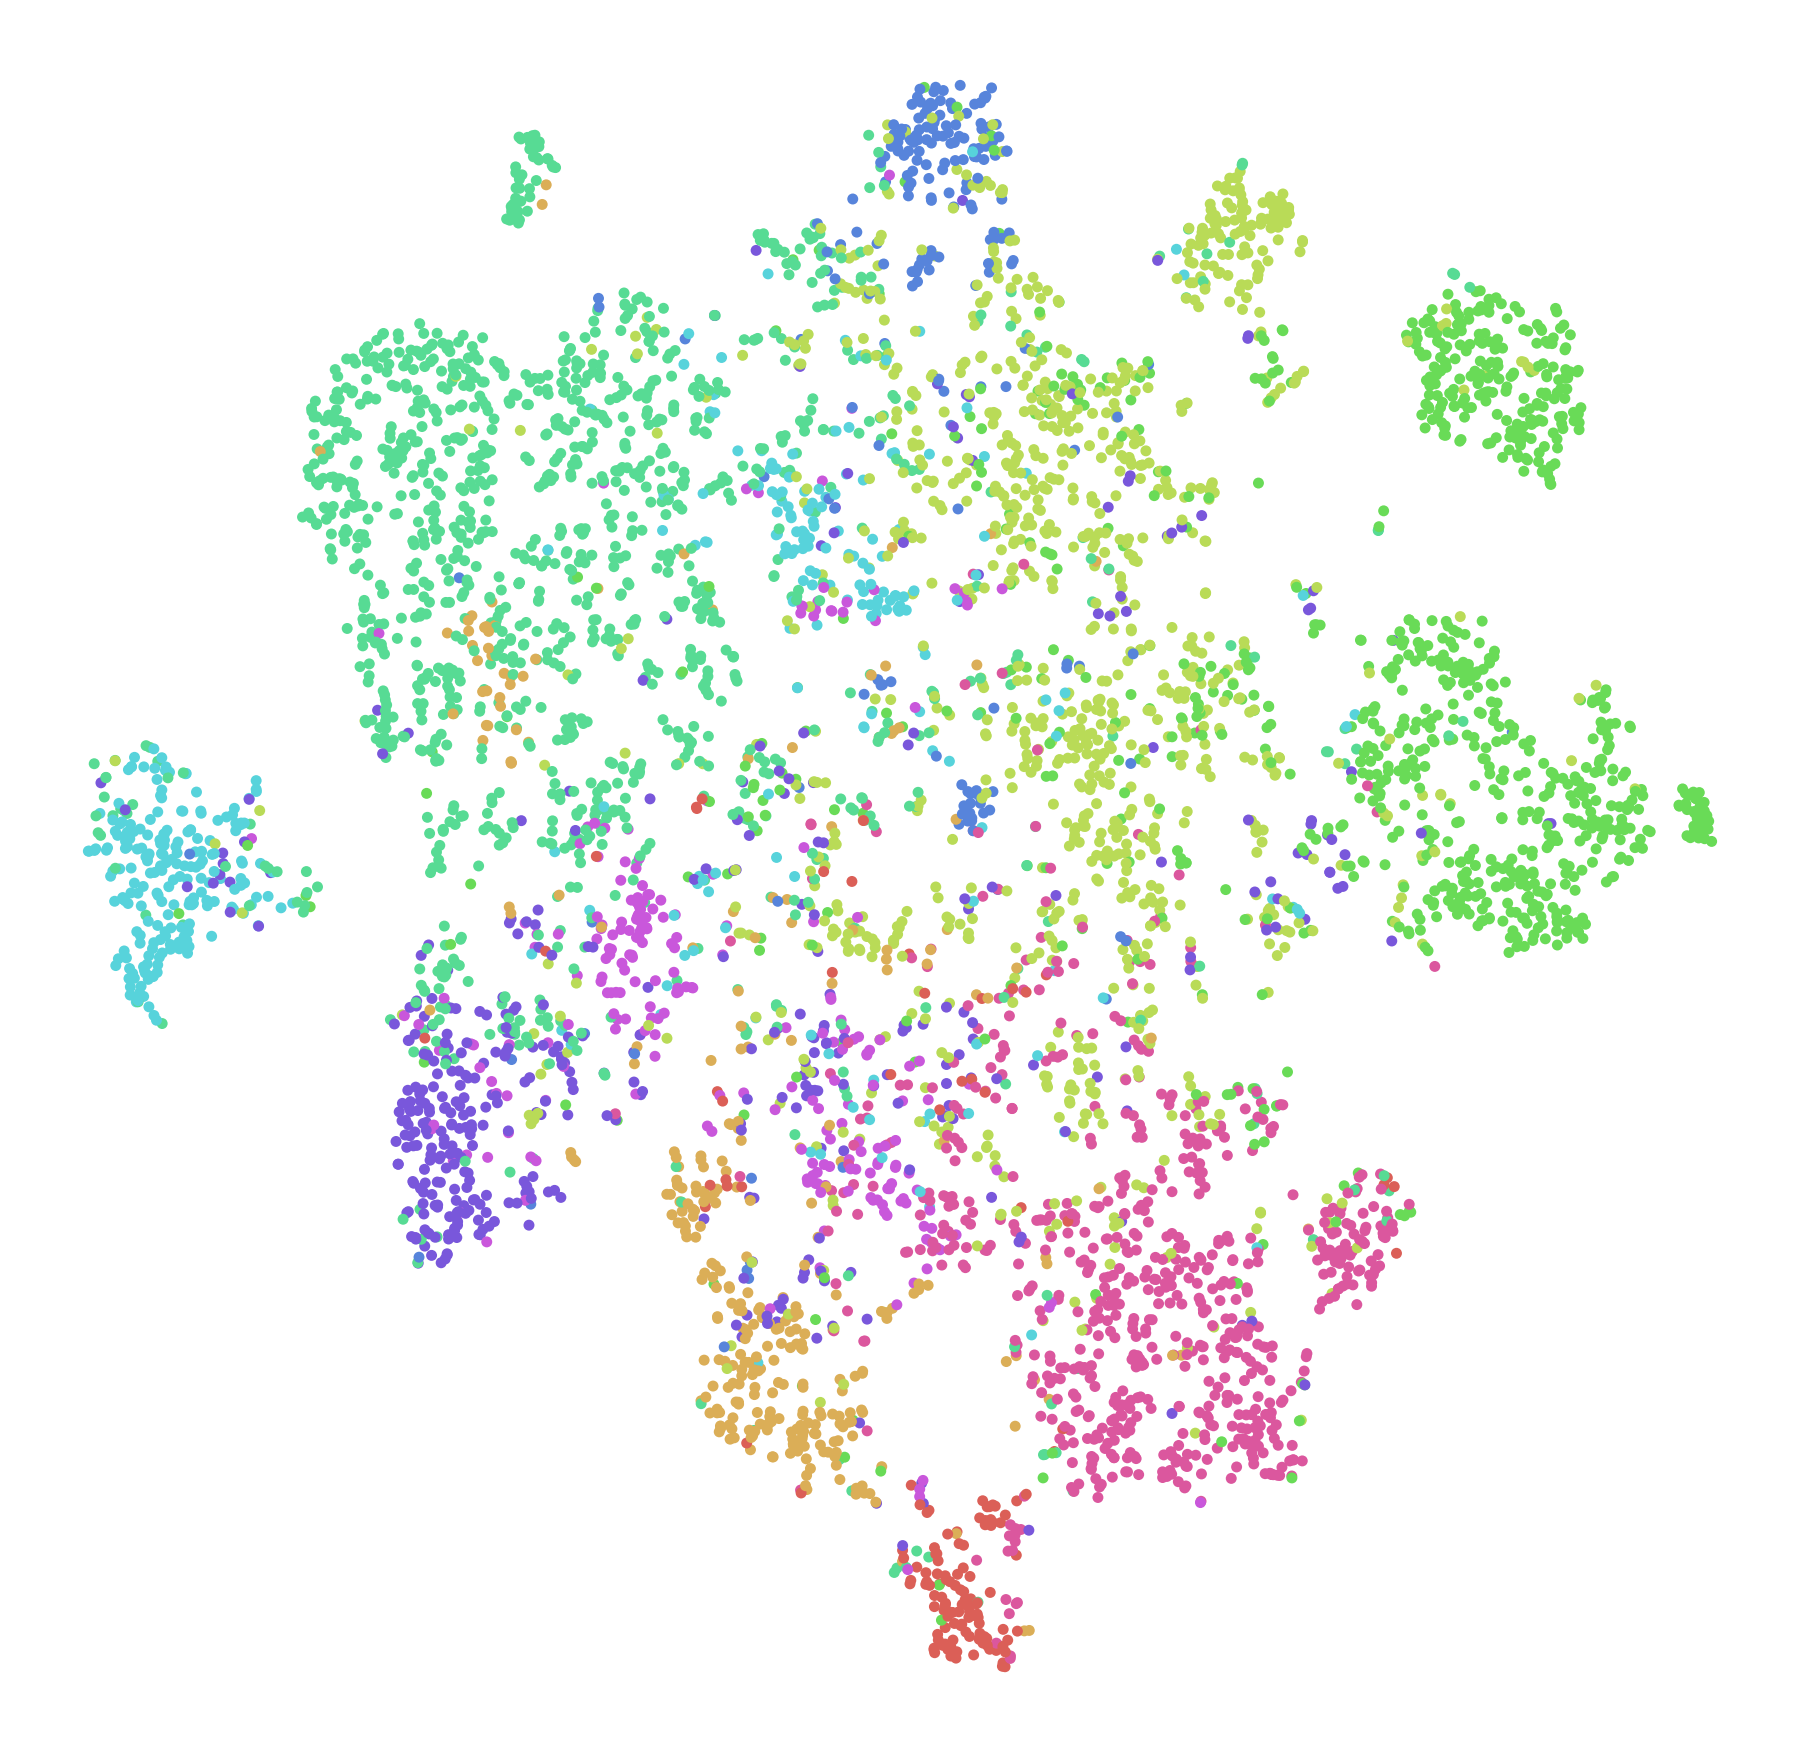

In [123]:
pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshaugment_20_20_30_2_30_true_2'
augmented_embedding = np.load(pred_dir+'/embeddings.npy')
wikics_augmented_tsne =  TSNE(random_state=0).fit_transform(augmented_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_augmented_tsne, y_test)

In [21]:
# pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/gswithembed'
# allnodeembeds = np.load(pred_dir+'/allnodeembeddings.npy')

In [22]:
#allnodeembeds.shape

In [6]:
gs_top_lsh_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshmeangsembed_20_20_10_2_20_false_2_concat'
gs_top_gs_dir = '/home/thummala/graphsage-pytorch/res/wikics/gstoppedgs'
graphsage_dir = '/home/thummala/graphsage-pytorch/res/wikics/gswithembed'

In [7]:
## Loading test embeddings
gs_embedding = np.load(graphsage_dir+'/embeddings.npy')
gs_top_gs_embedding = np.load(gs_top_gs_dir+'/embeddings.npy')
gs_top_lsh = np.load(gs_top_lsh_dir+'/embeddings.npy')
gs_embedding.shape

(5847, 128)

In [8]:
labels = np.array(data_dic['labels'])
y_test = labels[data_dic['test_mask']]

In [9]:
y_pred_gs = np.load(graphsage_dir+'/predictions.npy')
y_pred_gstoplsh = np.load(gs_top_lsh_dir+'/predictions.npy')
y_pred_gstopgs = np.load(gs_top_gs_dir+'/predictions.npy')

In [10]:
print(y_test)
print(y_pred_gs)
print(y_pred_gstoplsh)
print(y_pred_gstopgs)

[2 4 2 ... 4 3 2]
[2 4 4 ... 4 3 2]
[2 4 4 ... 4 3 2]
[2 4 4 ... 4 3 2]


In [11]:
gs_top_lsh.shape

(5847, 128)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f27315d2f28>)

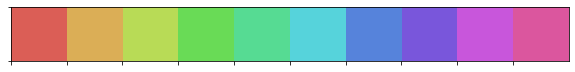

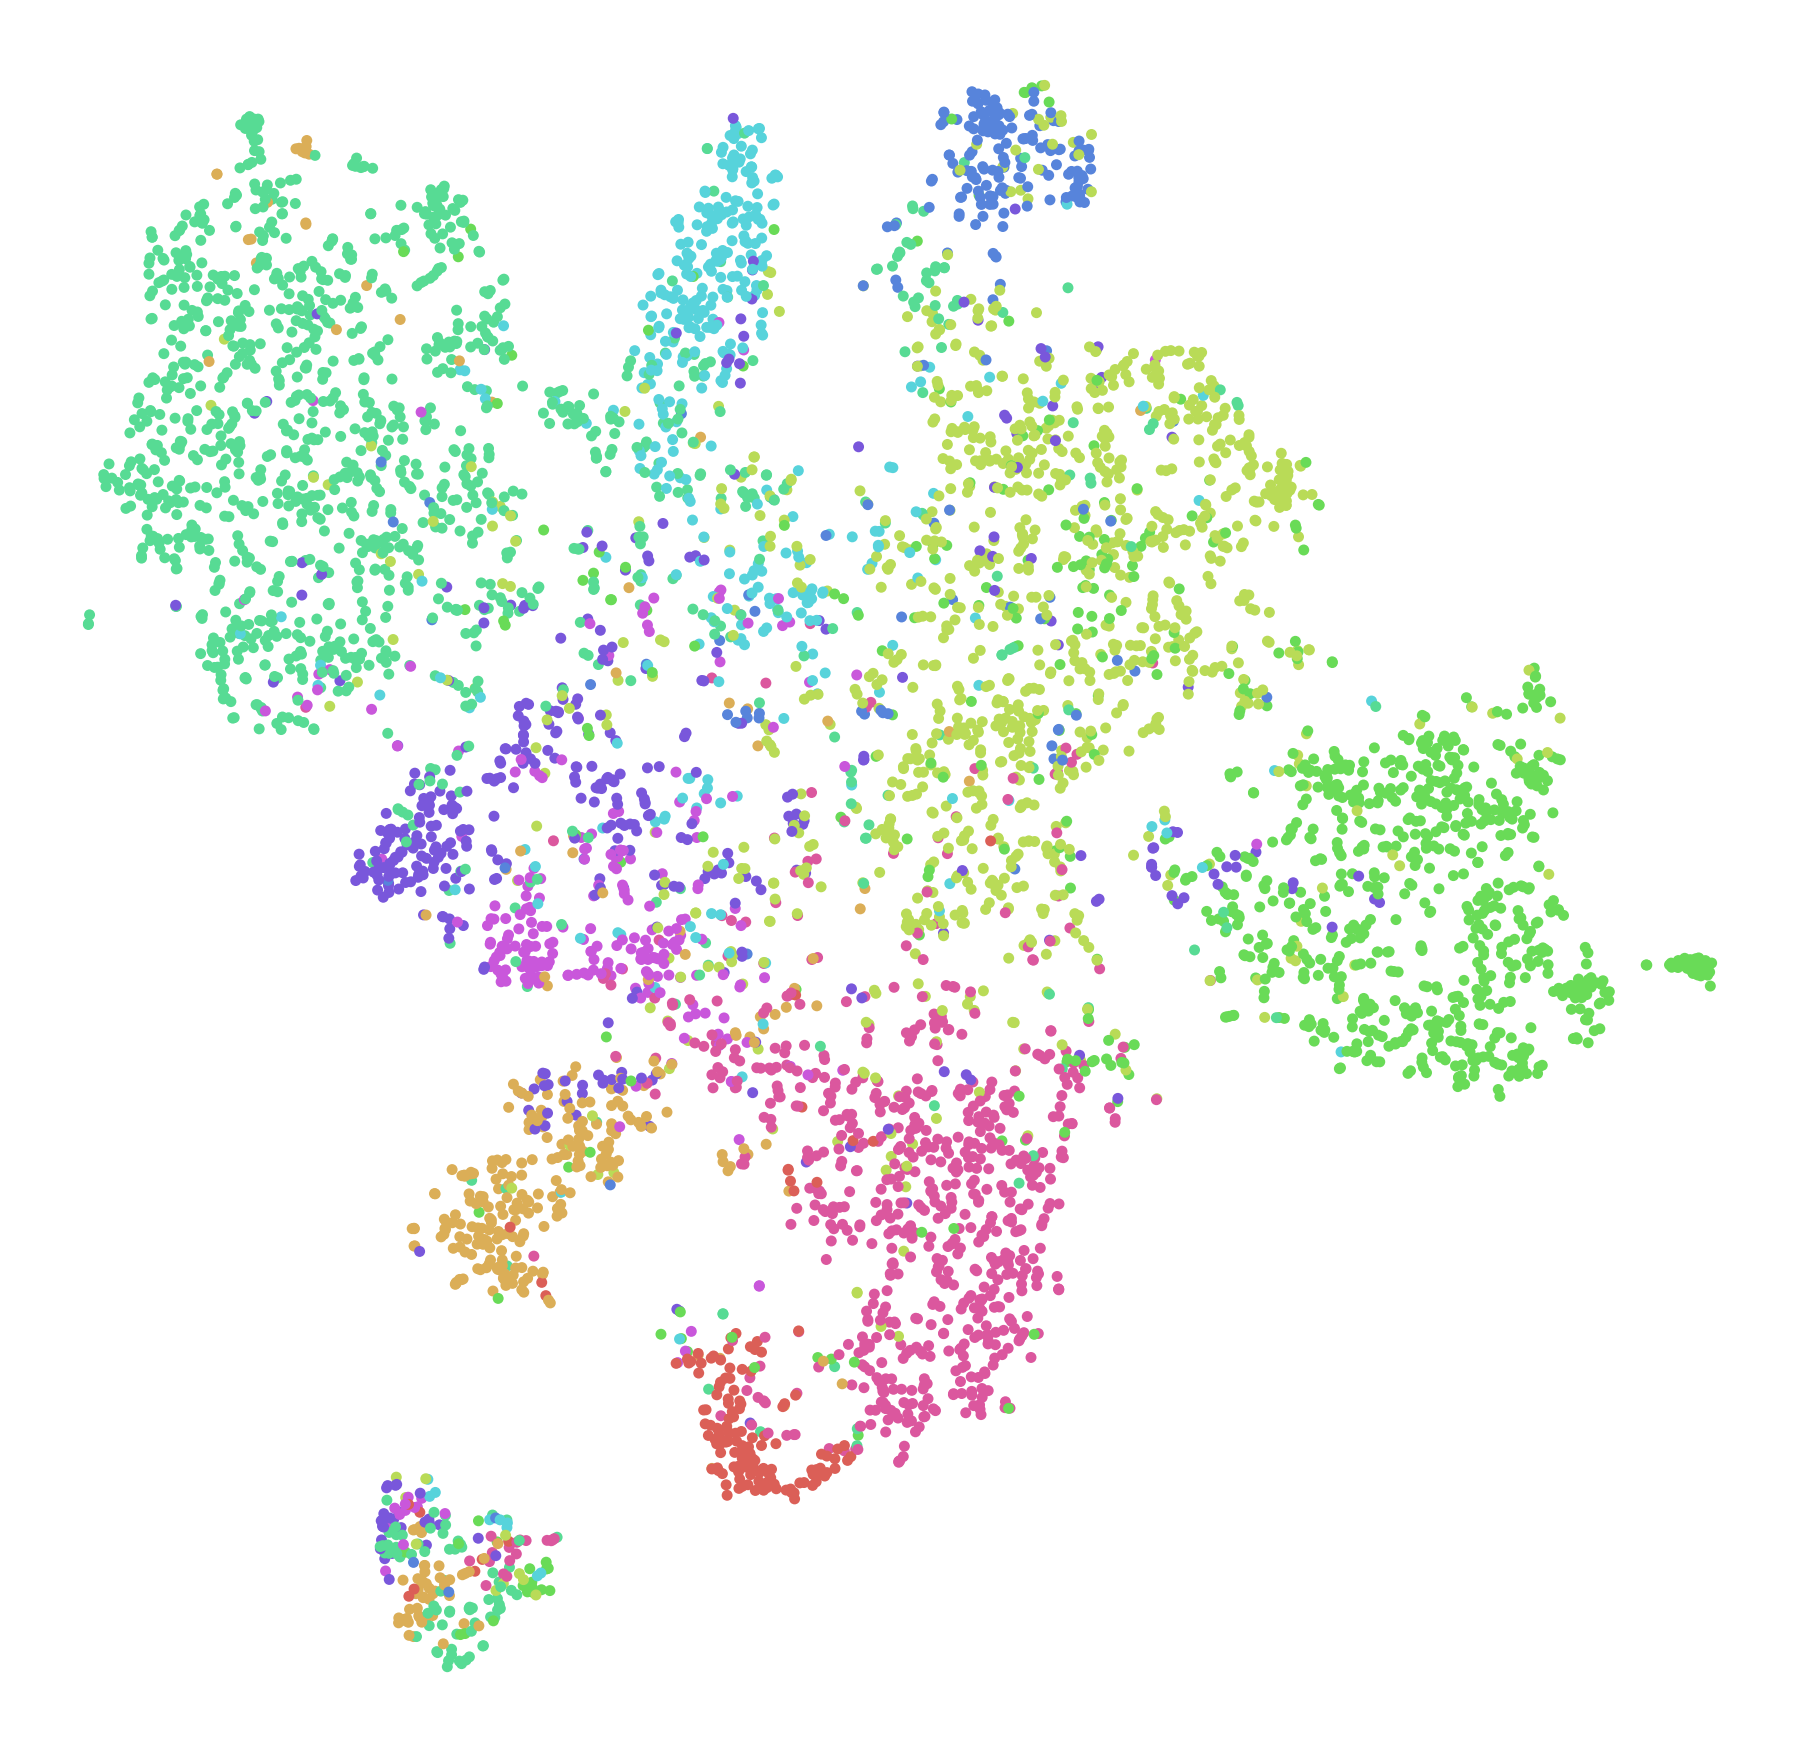

In [28]:
wikics_gs_tsne =  TSNE(random_state=0).fit_transform(gs_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_gs_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f273bb5df28>)

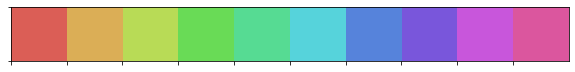

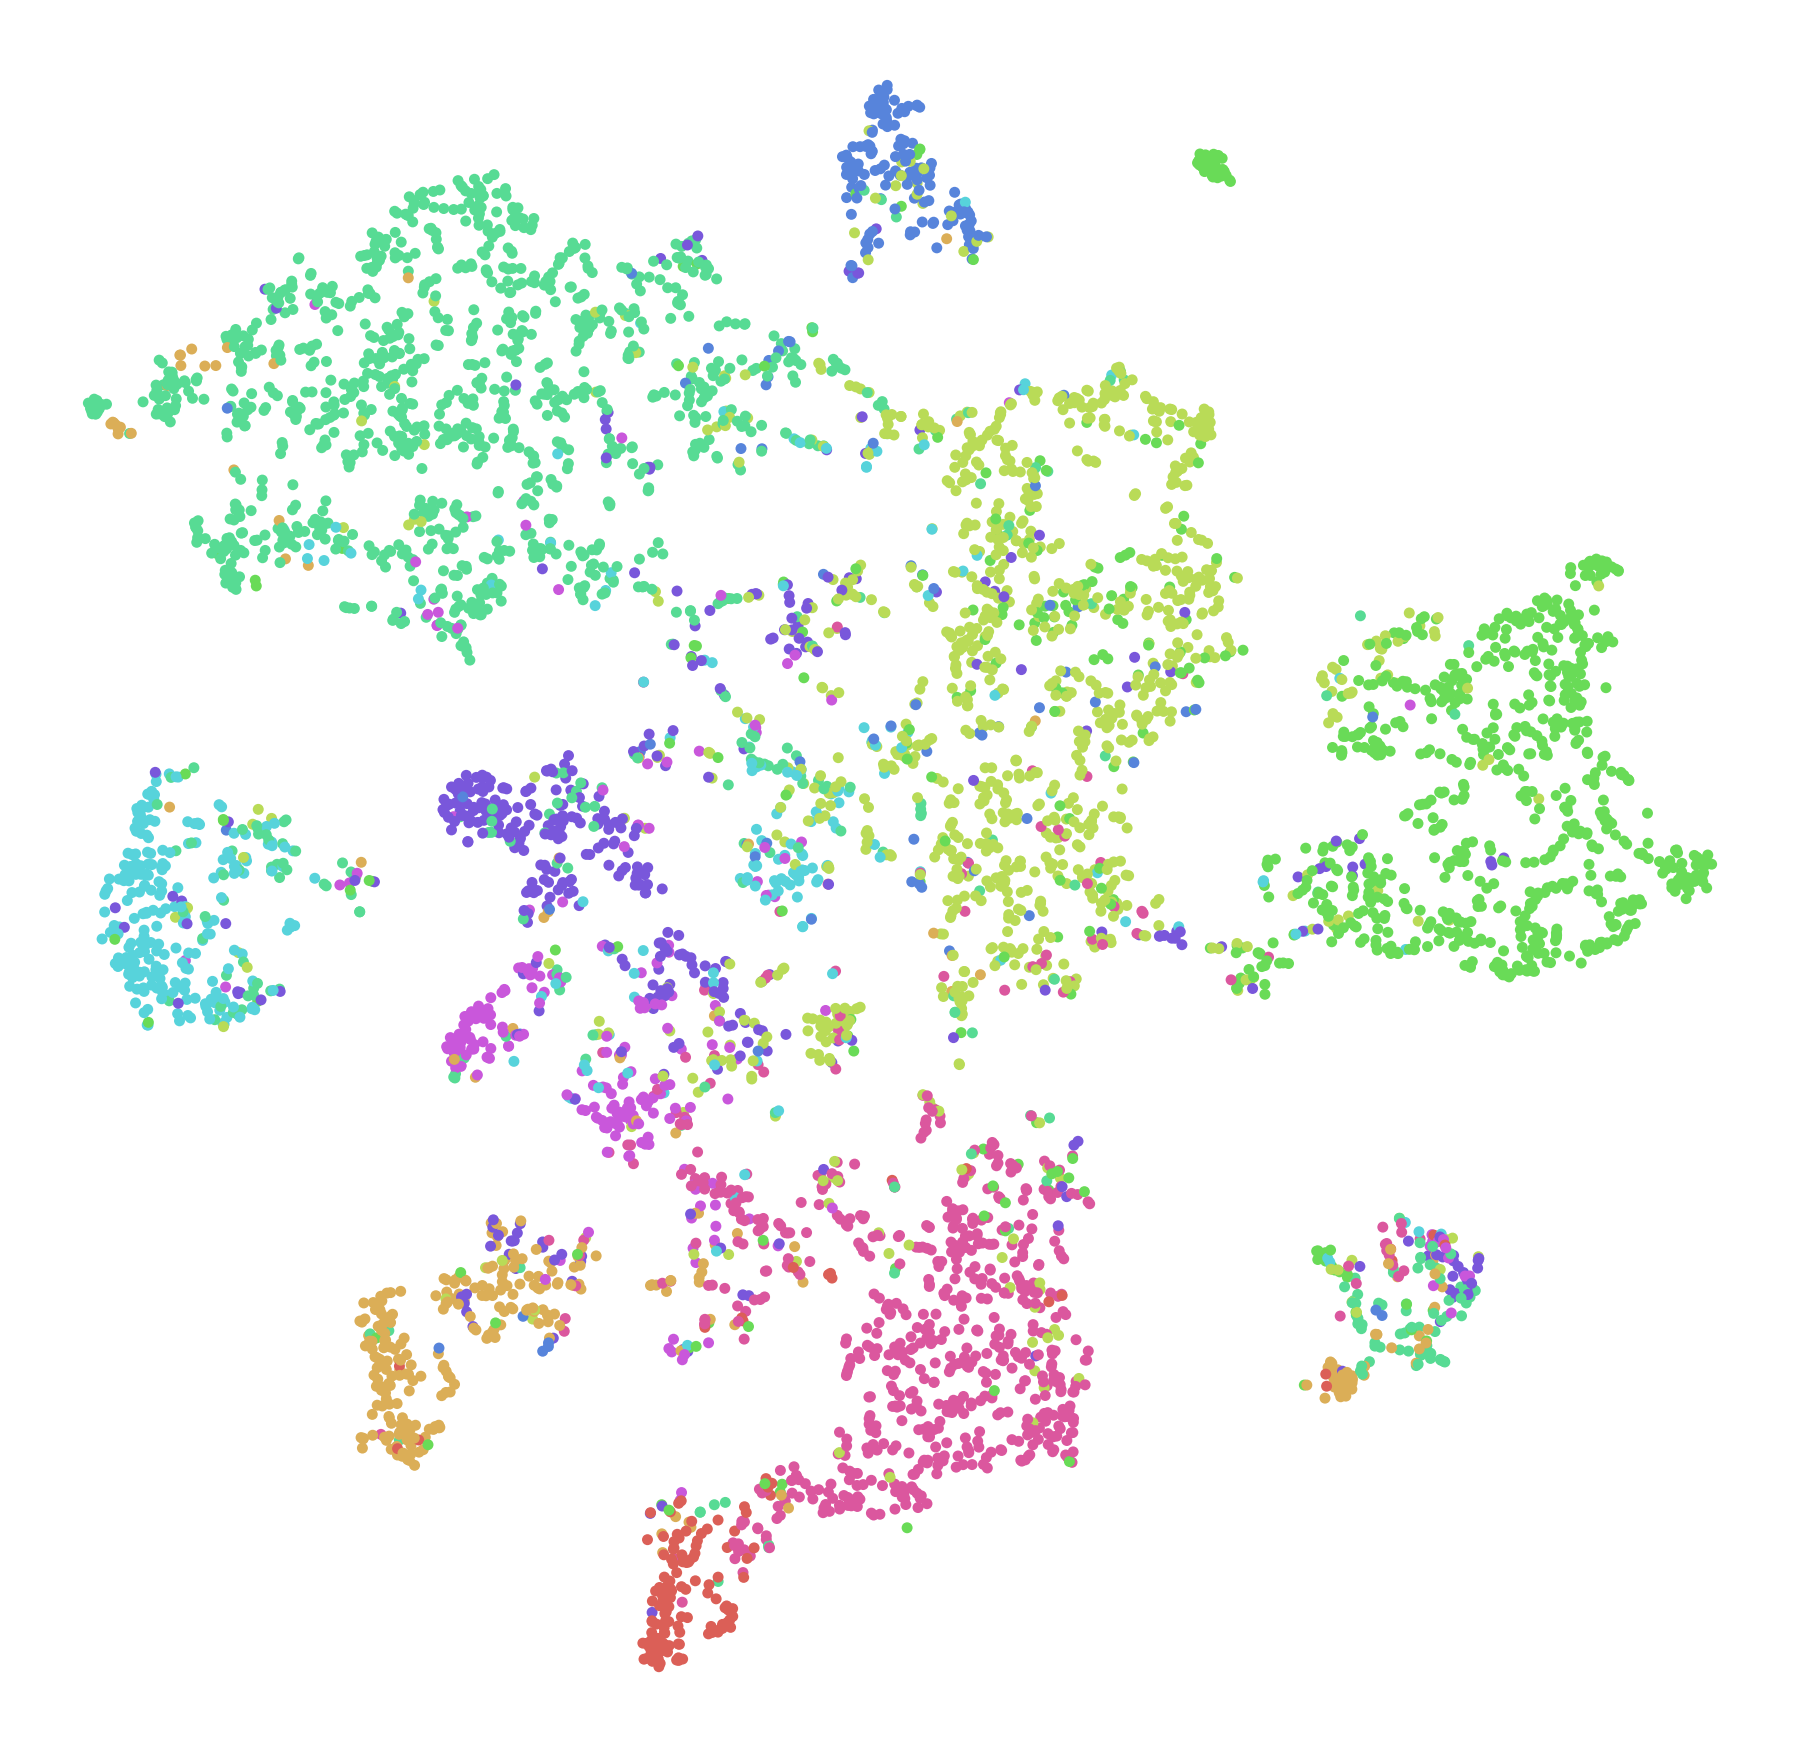

In [29]:
wikics_gstoplsh_tsne =  TSNE(random_state=0).fit_transform(gs_top_lsh)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_gstoplsh_tsne, y_test)

In [12]:
## misclassfied_index
graphsagemisclassified_index = y_test != y_pred_gs
gstoppedlsh_misclassified_index = y_test != y_pred_gstoplsh
gstoppedgs_misclassified_index = y_test != y_pred_gstopgs

In [14]:
~graphsagemisclassified_index

array([ True,  True, False, ...,  True,  True,  True])

In [36]:
## low degree test nodes
low_degree = 5
test_nodes = [i for i,x in enumerate(data_dic['test_mask']) if x]
test_nodes_lowd = []
for node in test_nodes:
    if len(data_dic['adj_lists'][node]) <= low_degree:
        test_nodes_lowd.append(True)
    else:
        test_nodes_lowd.append(False)
test_nodes_lowd = np.array(test_nodes_lowd)
print(len(test_nodes),test_nodes_lowd.sum())

5847 2156


In [40]:
np.logical_and(test_nodes_lowd, graphsagemisclassified_index).sum()

586

In [43]:
print("total low degree nodes ",test_nodes_lowd.sum())
print("low degree nodes misclassified by: ")
print("graphsage ", np.logical_and(test_nodes_lowd, graphsagemisclassified_index).sum())
print("graphsage topped with lsh ",np.logical_and(test_nodes_lowd, gstoppedlsh_misclassified_index).sum())
print("graphsage topped with graphsage ",np.logical_and(test_nodes_lowd, gstoppedgs_misclassified_index).sum())

total low degree nodes  2156
low degree nodes misclassified by: 
graphsage  586
graphsage topped with lsh  561
graphsage topped with graphsage  595


In [42]:
print("total nodes ",len(test_nodes))
print("test nodes misclassified by: ")
print("graphsage ", graphsagemisclassified_index.sum())
print("graphsage topped with lsh ",gstoppedlsh_misclassified_index.sum())
print("graphsage topped with graphsage ",gstoppedgs_misclassified_index.sum())

total nodes  5847
test nodes misclassified by: 
graphsage  1431
graphsage topped with lsh  1355
graphsage topped with graphsage  1421


In [44]:
1431-1355

76

In [45]:
586-561

25

In [46]:
2156/5847

0.36873610398494955

In [47]:
25/76

0.32894736842105265

In [29]:
## Get nodes corrected by LSH topping for misclassified in GS and check pattern
corrected_nodes_lshtop_index = np.logical_and(graphsagemisclassified_index,~gstoppedlsh_misclassified_index)

In [30]:
test_nodes = np.array([i for i,x in enumerate(data_dic['test_mask']) if x])

In [32]:
corrected_nodes_lshtop = test_nodes[corrected_nodes_lshtop_index]
corrected_nodes_lshtop.shape

(185,)

In [33]:
test_adjacency = {}
corrected_node_adjacency = {}
for node in test_nodes:
    test_adjacency[node] = data_dic['adj_lists'][node]
for node in corrected_nodes_lshtop:
    corrected_node_adjacency[node] = data_dic['adj_lists'][node]

In [39]:
def avg(mylist):
    return sum(mylist)/len(mylist)
def label_rate(adj_list,labels):
    same_label_count=[]
    diff_label_count=[]
    same_label_count_ld = []
    diff_label_count_ld = []
    zero_neighbour_node_count = 0
    for node, neighbours in adj_list.items():
        current_node_label = labels[node]
        count1,count2=0,0
        for neigh in list(neighbours):
            if current_node_label == labels[neigh]:
                count1+=1
            else:
                count2+=1
        if len(neighbours) == 0:
            zero_neighbour_node_count += 0
            same_label_count.append(0)
            diff_label_count.append(0)
        else:
            if len(neighbours) <= 5:
                same_label_count_ld.append(count1/len(neighbours))
                diff_label_count_ld.append(count2/len(neighbours))
            same_label_count.append(count1/len(neighbours))
            diff_label_count.append(count2/len(neighbours))
    #print(same_label_count,diff_label_count)
    return avg(same_label_count),avg(diff_label_count),avg(same_label_count_ld),avg(diff_label_count_ld), zero_neighbour_node_count 

In [40]:
## Get label rate for the corrected nodes
print("same_label_count "," diff_label_count "," same label count (ld) ", " diff label count (ld)")
print(label_rate(corrected_node_adjacency,data_dic['labels']))

same_label_count   diff_label_count   same label count (ld)   diff label count (ld)
(0.6038815671779546, 0.32044275714636994, 0.6440677966101697, 0.3559322033898305, 0)


In [48]:
def get_centroid(feat_data):
    return feat_data.mean(axis=0)
def get_mean_distance_from_centroid(points_subset,points,distance_type='euclidean'):
    distance_ = cdist(points_subset,get_centroid(points).reshape(1,-1),metric=distance_type).mean(axis=0)[0]
    return distance_
def get_distance_to_other_centroids(points,centroids_mod,distance_type='euclidean',measure='nearest'):
    dist_mat = cdist(points,centroids_mod,metric=distance_type)
    if measure == 'nearest':
        interdist = dist_mat.min(axis=1).mean()
    elif measure == 'mean':
        interdist = dist_mat.mean(axis=1).mean()
    else:
        print('specify correct measure')
        return 0
    return interdist
def get_ratio(list1,list2):
    temp=[]
    for i in range(len(list1)):
        temp.append(list1[i]/list2[i])
    return temp
#get_ratio(mean_distance_owncentroid,mean_distance_othercentroid)

def give_distance_statistics(points_subset,feat_data, labels, measure='nearest',distance_type='euclidean'):
    feat_data = np.array(data_dic['feat_data'])
    labels = np.array(data_dic['labels'])
    point_features=[]
    point_labels = []
    for p in points_subset:
        point_labels.append(labels[p])
        point_features.append(feat_data[p])
    point_features=np.array(point_features)
    point_labels=np.array(point_labels)
    mean_distance_owncentroid = []
    mean_distance_othercentroid = []
    centroids = []
    for i in sorted(list(np.unique(labels))):
        centroids.append(get_centroid(feat_data[(labels == i).reshape(-1,)]).tolist())
    for i in sorted(list(np.unique(labels))):
        temp = centroids.copy()
        temp.pop(i)
        mean_distance_owncentroid.append(get_mean_distance_from_centroid(point_features[(point_labels == i).reshape(-1,)],feat_data[(labels == i).reshape(-1,)],distance_type=distance_type))
        mean_distance_othercentroid.append(get_distance_to_other_centroids(point_features[(point_labels == i).reshape(-1,)],temp,distance_type=distance_type,measure=measure))
    return get_ratio(mean_distance_owncentroid,mean_distance_othercentroid)

In [49]:
from scipy.spatial.distance import cdist
give_distance_statistics(corrected_nodes_lshtop, data_dic['feat_data'],data_dic['labels'])

[0 1 2 3 4 5 6 7 8 9]


[0.8554703417729415,
 0.8155789476790507,
 0.9469266369700359,
 1.261516713527444,
 1.1182293034125137,
 0.8347131460950412,
 0.8260223063054507,
 0.9571131370160625,
 0.7974506190481525,
 0.982182653878746]

In [57]:
from collections import Counter
feat_data = np.array(data_dic['feat_data'])
labels = np.array(data_dic['labels'])
point_features=[]
point_labels = []
for p in corrected_nodes_lshtop:
    point_labels.append(labels[p])
    point_features.append(feat_data[p])
Counter(sorted(point_labels))

Counter({0: 4, 1: 12, 2: 58, 3: 7, 4: 40, 5: 9, 6: 8, 7: 13, 8: 16, 9: 18})

## Pubmed

In [58]:
gs_top_lsh_dir = '/home/thummala/graphsage-pytorch/res/pubmed/gstoppedlsh_20_20_10_2_20_false_2_concat'
graphsage_dir = '/home/thummala/graphsage-pytorch/res/pubmed/gswithemebeds'

In [60]:
data_dic = custom_load_pubmed(lsh_helper={})

loading gs embeddings as node features  (19717, 128)


In [61]:
data_dic.keys()

dict_keys(['feat_data', 'labels', 'adj_lists', 'train_mask', 'test_mask', 'val_mask', 'distances', 'cluster_labels', 'freq', 'dist_in_graph', 'centralityev', 'centralitybtw', 'centralityh', 'centralityd', 'lsh_neighbour_list'])

In [62]:
data_dic['test_mask']

[]